<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/b%C3%A0i_t%E1%BA%ADp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
distance=ctrl.Antecedent(np.arange(0,51,0.5),'distance')
traffic_condition=ctrl.Antecedent(np.arange(0,101,0.1),'traffic_condition')
demand_level=ctrl.Antecedent(np.arange(0,100,1),'demand_level')
weather_condition=ctrl.Antecedent(np.arange(0,3.1,0.1),'weather_condition')
customer_rating=ctrl.Antecedent(np.arange(0,5.1,0.1),'customer_rating')
ride_punctuality=ctrl.Antecedent(np.arange(0,101,0.5),'ride_punctuality')
#output
price=ctrl.Consequent(np.arange(0,4.1,0.1),'price')
point=ctrl.Consequent(np.arange(0,4.1,0.1),'point')


In [ ]:
distance['s']=fuzz.trimf(distance.universe,[0,0,3])
distance['m']=fuzz.trimf(distance.universe,[2,5,8])
distance['l']=fuzz.trimf(distance.universe,[6.5,13,20])
distance['vl']=fuzz.trimf(distance.universe,[15,50,50])
traffic_condition['l']=fuzz.trimf(traffic_condition.universe,[0,0,30])
traffic_condition['m']=fuzz.trimf(traffic_condition.universe,[20,50,60])
traffic_condition['h']=fuzz.trimf(traffic_condition.universe,[60,80,100])
demand_level['l']=fuzz.trimf(demand_level.universe,[0,0,30])
demand_level['m']=fuzz.trimf(demand_level.universe,[20,50,80])
demand_level['h']=fuzz.trimf(demand_level.universe,[70,100,100])
weather_condition['g']=fuzz.trimf(weather_condition.universe,[0,0,1])
weather_condition['m']=fuzz.trimf(weather_condition.universe,[0,1,2])
weather_condition['b']=fuzz.trimf(weather_condition.universe,[1,2,3])
customer_rating['p']=fuzz.trimf(customer_rating.universe,[0,1,2.5])
customer_rating['a']=fuzz.trimf(customer_rating.universe,[2,3,4])
customer_rating['g']=fuzz.trimf(customer_rating.universe,[3.5,4,5])
ride_punctuality['l']=fuzz.trimf(ride_punctuality.universe,[0,0,50])
ride_punctuality['ot']=fuzz.trimf(ride_punctuality.universe,[40,50,80])
ride_punctuality['e']=fuzz.trimf(ride_punctuality.universe,[70,100,100])
price['l']=fuzz.trimf(price.universe,[0,0,1])
price['m']=fuzz.trimf(price.universe,[0,1,2])
price['h']=fuzz.trimf(price.universe,[1,2,3])
price['vh']=fuzz.trimf(price.universe,[2,3,4])
point['n']=fuzz.trimf(point.universe,[0,0,1])
point['f']=fuzz.trimf(point.universe,[0,1,2])
point['m']=fuzz.trimf(point.universe,[1,2,3])
point['h']=fuzz.trimf(point.universe,[2,3,4])

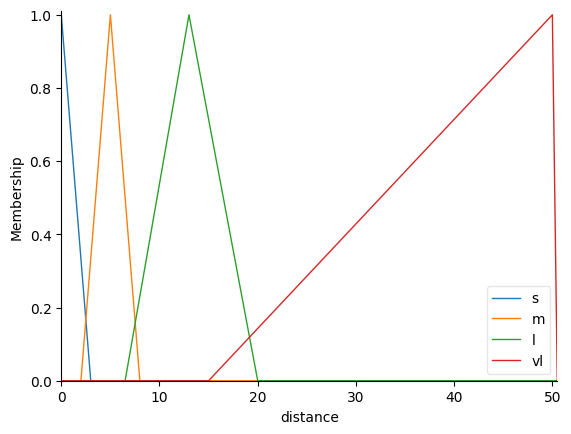

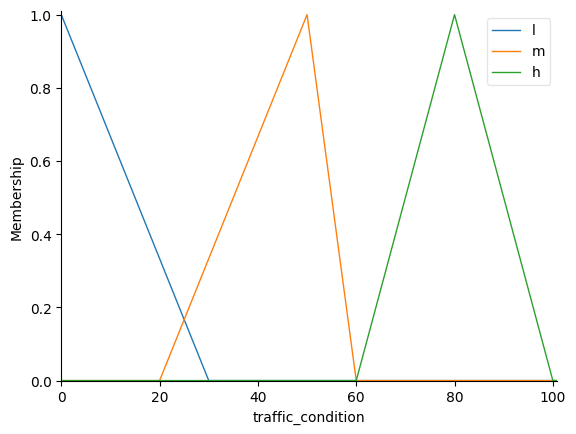

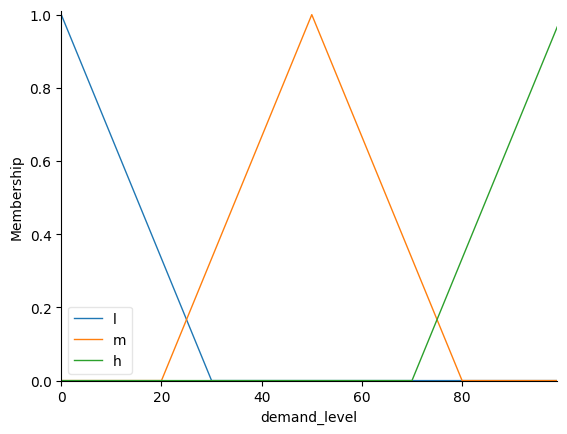

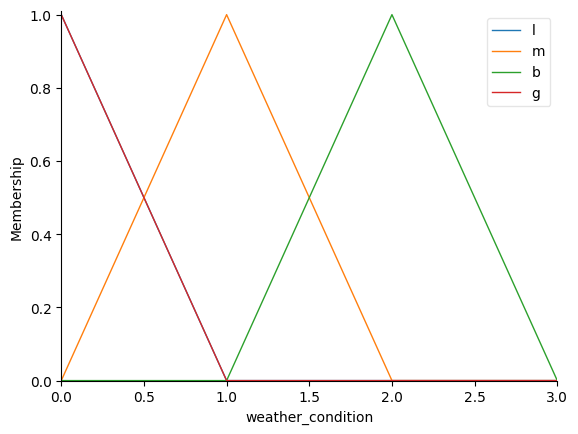

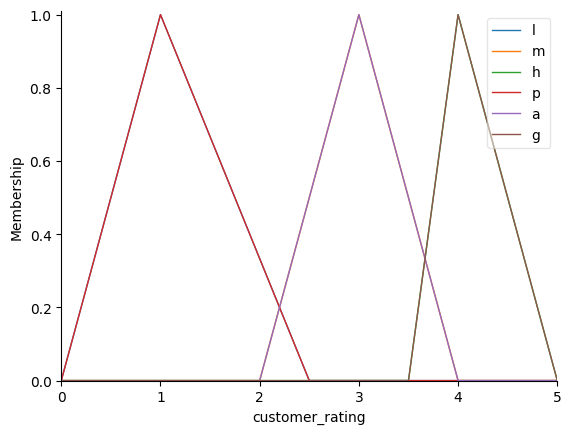

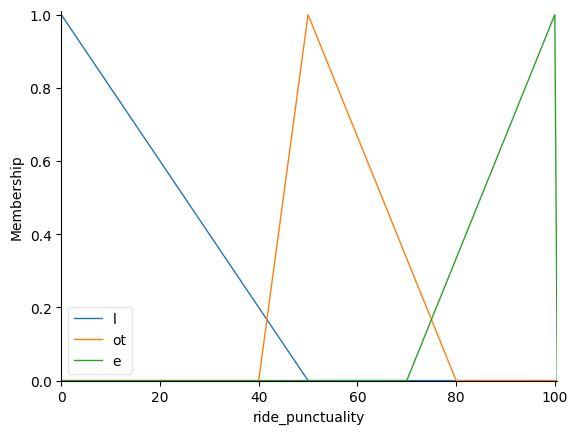

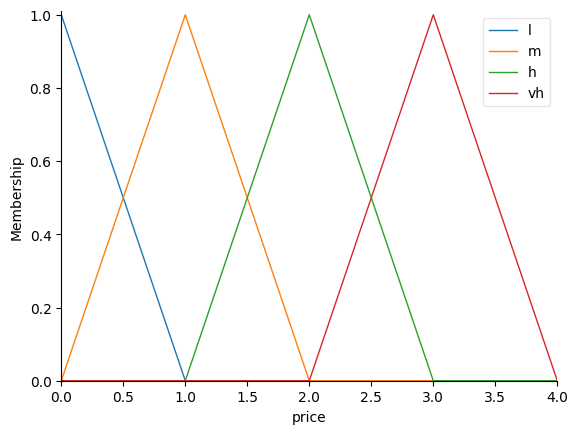

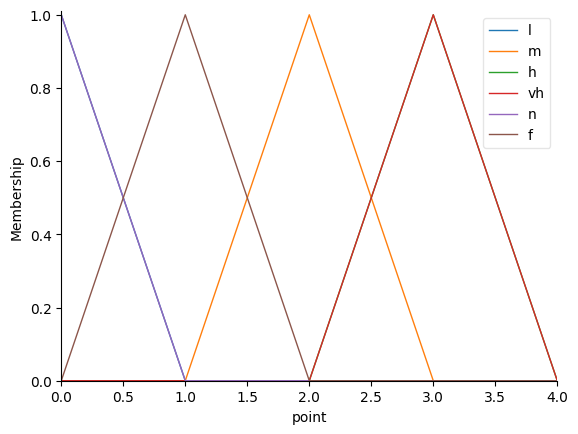

In [ ]:
distance.view()
traffic_condition.view()
demand_level.view()
weather_condition.view()
customer_rating.view()
ride_punctuality.view()
price.view()
point.view()

In [ ]:
rule1 = ctrl.Rule(distance['s'] & traffic_condition['l'] & demand_level['l'], price['l'])
rule2 = ctrl.Rule(distance['s'] & traffic_condition['m'] & demand_level['m'], price['m'])
rule3 = ctrl.Rule(distance['m'] & traffic_condition['h'] & demand_level['h'], price['h'])
rule4 = ctrl.Rule(distance['l'] & traffic_condition['m'] & weather_condition['g'], price['m'])
rule5 = ctrl.Rule(distance['l'] & traffic_condition['h'] & weather_condition['b'], price['vh'])
rule6 = ctrl.Rule(distance['vl'] & traffic_condition['h'] & demand_level['h'], price['vh'])
rule7 = ctrl.Rule(distance['m'] & traffic_condition['l'] & demand_level['l'], price['m'])
rule8 = ctrl.Rule(distance['s'] & traffic_condition['m'] & weather_condition['b'], price['h'])
rule9 = ctrl.Rule(distance['vl'] & weather_condition['b'], price['vh'])
rule10 = ctrl.Rule(distance['m'] & traffic_condition['m'] & weather_condition['g'], price['m'])

rule11 = ctrl.Rule(customer_rating['g'] & ride_punctuality['e'], point['h'])
rule12 = ctrl.Rule(customer_rating['m'] & ride_punctuality['ot'], point['m'])
rule13 = ctrl.Rule(customer_rating['p'] & ride_punctuality['ot'], point['n'])
rule14 = ctrl.Rule(distance['l'] & traffic_condition['h'] & ride_punctuality['ot'], point['h'])
rule15 = ctrl.Rule(distance['m'] & traffic_condition['m'] & customer_rating['g'], point['m'])
rule16 = ctrl.Rule(customer_rating['p'] & ride_punctuality['ot'], point['n'])
rule17 = ctrl.Rule(distance['vl'] & weather_condition['b'] & customer_rating['g'], point['h'])
rule18 = ctrl.Rule(distance['s'] & customer_rating['m'] & ride_punctuality['ot'], point['f'])
rule19 = ctrl.Rule(distance['l'] & traffic_condition['h'] & ride_punctuality['ot'], point['f'])
rule20 = ctrl.Rule(distance['m'] & weather_condition['m'] & customer_rating['g'], point['m'])

2.999999999999999
1.9999999999999996


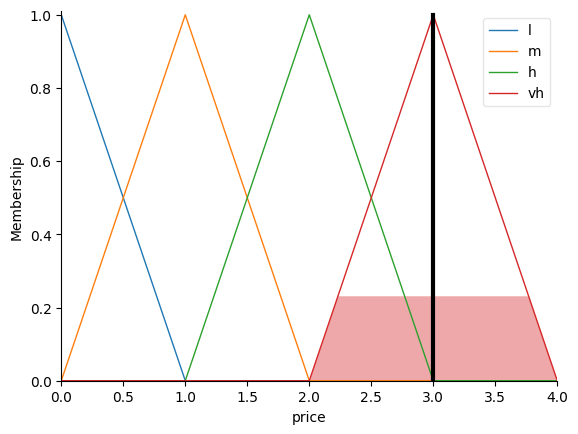

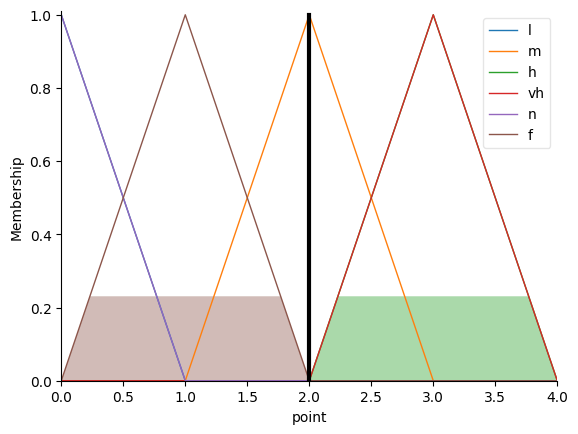

In [ ]:
final_price=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
sim=ctrl.ControlSystemSimulation(final_price)
sim.input['distance']=8
sim.input['traffic_condition']=65
sim.input['demand_level']=35
sim.input['weather_condition']=2
sim.input['customer_rating']=4
sim.input['ride_punctuality']=70
sim.compute()
print(sim.output['price'])
print(sim.output['point'])
price.view(sim)
point.view(sim)